# Data Structures

In [1]:
%matplotlib inline

import pandas
import geopandas
import rasterio
from rasterio.plot import show as rioshow

ModuleNotFoundError: No module named 'rasterio'

## Contents

* [Core data types](#Core-data-types)
* [Reading (spatial) data](#Reading-(spatial)-data)
* [`(Geo)DataFrames`](#(Geo)DataFrames)
* [`Series`](#Series)
* [The `geometry` column](#The-geometry-column)
    * [CRS](#CRS)
    * [Geometries](#Geometries)
    * [Geometric operations](#Geometric-operations)
* [A note on rasters](#A-note-on-rasters)

## Core data types

Core:

In [2]:
type(1)

int

In [3]:
type(1.0)

float

In [4]:
type('a')

str

In [5]:
type('hello world!')

str

Extensions:

In [6]:
pandas.to_datetime("2019-11-05 9:00")

Timestamp('2019-11-05 09:00:00')

In [7]:
pandas.Categorical(["Apples", "Oranges"])

[Apples, Oranges]
Categories (2, object): [Apples, Oranges]

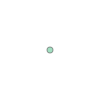

In [8]:
from shapely.geometry import Point

Point(-0.08947918950509948, 51.49441830214852)

## Reading (spatial) data

For non-spatial data, we use `pandas` and its `read_XXX` methods. Have a peak at what's available by typing `pandas.read_` and pressing `TAB`; auto-completion will show you all supported file formats.

For spatial data, `geopandas` *extends* `pandas` functionality to support vector spatial data. Let's illustrate its main `read_file` method with a dataset of AirBnb aggregate statistics for Inner London:

In [9]:
db = geopandas.read_file('../data/lux_regions.gpkg')

## `(Geo)DataFrames`

When you read a multi-column tabular file, a `DataFrame` is created. If that table contains spatial information and is read with `geopandas`, you get a `GeoDataFrame`:

In [10]:
type(db)

geopandas.geodataframe.GeoDataFrame

Both data structures are very similar and modeled after relational databases like SQL (and not completely unlike an Excel Spreadsheet!). Let's print the top ("head") of the table to inspect its contents:

In [11]:
db.head()

,POPULATION,COMMUNE_1,LAU2,_subtype,COMMUNE,DISTRICT,CANTON,tree_count,ghsl_pop,light_level,geometry
0,10750,Schifflange,0214,Inspire_10072018,Schifflange,Luxembourg,Esch-sur-Alzette,3.0,7699.378065,681.0,"POLYGON ((5.999664443592493 49.51861834298563,..."
1,1265,Bech,1002,Inspire_10072018,Bech,Grevenmacher,Echternach,4.0,1156.143936,567.0,"POLYGON ((6.347791382484162 49.76015684859829,..."
2,35040,Esch-sur-Alzette,0204,Inspire_10072018,Esch-sur-Alzette,Luxembourg,Esch-sur-Alzette,0.0,30072.804172,1370.0,"POLYGON ((5.966652609366625 49.51287419342548,..."
3,8169,Walferdange,0310,Inspire_10072018,Walferdange,Luxembourg,Luxembourg,4.0,7496.442968,730.0,"POLYGON ((6.125796013396808 49.66347171771235,..."
4,9440,Mersch,0409,Inspire_10072018,Mersch,Luxembourg,Mersch,9.0,8168.835842,2388.0,"POLYGON ((6.08267171189537 49.77458013764257, ..."


Other quick exploratory methods:

In [12]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
POPULATION     102 non-null int64
COMMUNE_1      102 non-null object
LAU2           102 non-null object
_subtype       102 non-null object
COMMUNE        102 non-null object
DISTRICT       102 non-null object
CANTON         102 non-null object
tree_count     102 non-null float64
ghsl_pop       102 non-null float64
light_level    102 non-null float64
geometry       102 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 8.9+ KB


In [13]:
db.shape

(102, 11)

In [14]:
db.describe()

,POPULATION,tree_count,ghsl_pop,light_level
count,102.000000,102.000000,102.000000,102.000000
mean,5902.009804,5.245098,5542.161666,1076.931373
std,12231.243923,5.627789,11155.324437,749.838811
min,790.000000,0.000000,815.144388,299.000000
25%,1915.000000,2.000000,1726.167268,628.750000
50%,2937.500000,4.000000,3072.414461,896.500000
75%,5489.000000,7.000000,5190.177861,1255.250000
max,116323.000000,43.000000,106143.956825,5614.000000


## `Series`

`DataFrames` are two-dimensional array-like structures (think a matrix but with mixed types), and are "made up" of `Series`, which are one-dimensional objects (think of vectors). 

In [15]:
db['POPULATION'].head()

0    10750
1     1265
2    35040
3     8169
4     9440
Name: POPULATION, dtype: int64

## The `geometry` column

In [16]:
db['geometry'].head()

0    POLYGON ((5.999664443592493 49.51861834298563,...
1    POLYGON ((6.347791382484162 49.76015684859829,...
2    POLYGON ((5.966652609366625 49.51287419342548,...
3    POLYGON ((6.125796013396808 49.66347171771235,...
4    POLYGON ((6.08267171189537 49.77458013764257, ...
Name: geometry, dtype: object

Remember:

- (Almost) like a standard `Series` object
- Only one per `GeoDataFrame`
- Extends `pandas` bringing all sorts of geospatial goodies

### CRS

Small but powerful attribute:

In [17]:
db.crs

{'init': 'epsg:4326'}

**IMPORTANT**: `crs` is an attribute of a `GeoDataFrame`, not of each geometry!

In [18]:
db_wgs84 = db.to_crs(epsg=4326)

### Geometries

In [19]:
poly = db.loc[0, 'geometry']

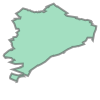

In [20]:
poly

In [21]:
poly.bounds

(5.993289939672974, 49.483288039852084, 6.041161215183009, 49.52370478379051)

In [22]:
poly.area

0.0009631318046161011

In [23]:
#poly.crs

### Geometric operations

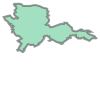

In [24]:
poly2 = db.loc[27, 'geometry']
poly2

In [25]:
poly.touches(poly2)

False

In [26]:
poly.intersects(poly2)

False

And we can "broadcast" this too!

In [27]:
db.touches(poly)

0      False
1      False
2       True
3      False
4      False
       ...  
97     False
98     False
99     False
100    False
101    False
Length: 102, dtype: bool

In [28]:
db[db.touches(poly)]

,POPULATION,COMMUNE_1,LAU2,_subtype,COMMUNE,DISTRICT,CANTON,tree_count,ghsl_pop,light_level,geometry
2,35040,Esch-sur-Alzette,0204,Inspire_10072018,Esch-sur-Alzette,Luxembourg,Esch-sur-Alzette,0.0,30072.804172,1370.0,"POLYGON ((5.966652609366625 49.51287419342548,..."
7,11003,Bettembourg,0201,Inspire_10072018,Bettembourg,Luxembourg,Esch-sur-Alzette,1.0,11060.821753,1909.0,"POLYGON ((6.06035425169626 49.54561673366194, ..."
41,9098,Kayl,0206,Inspire_10072018,Kayl,Luxembourg,Esch-sur-Alzette,7.0,6947.824143,1267.0,"POLYGON ((6.018431355561023 49.46931155795932,..."
47,6936,Mondercange,0208,Inspire_10072018,Mondercange,Luxembourg,Esch-sur-Alzette,4.0,8458.784720,2011.0,"POLYGON ((5.976497438379162 49.52610334413541,..."


## A note on rasters

Very different approach. Your friend here is `rasterio`.

In [29]:
p = '../data/lights.tif'
src = rasterio.open(p)

In [30]:
src.count

1

In [31]:
src.crs

CRS.from_epsg(4326)

In [32]:
src.bounds

BoundingBox(left=5.737499257050018, bottom=49.45416676884999, right=6.529165920550014, top=50.17916676594999)

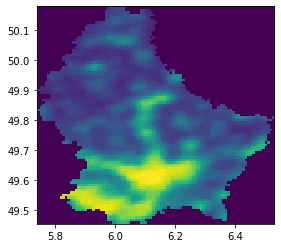

In [33]:
rioshow(src)